In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### EDA

In [2]:
# データのロード
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rank - Ranking of overall sales  
Name - The games name  
Platform - Platform of the games release (i.e. PC,PS4, etc.)  
Year - Year of the game's release  
Genre - Genre of the game  
Publisher - Publisher of the game  
NA_Sales - Sales in North America (in millions)  
EU_Sales - Sales in Europe (in millions)  
JP_Sales - Sales in Japan (in millions)  
Other_Sales - Sales in the rest of the world (in millions)  
Global_Sales - Total worldwide sales.  

In [3]:
# YearとPublisherに欠損値あり
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


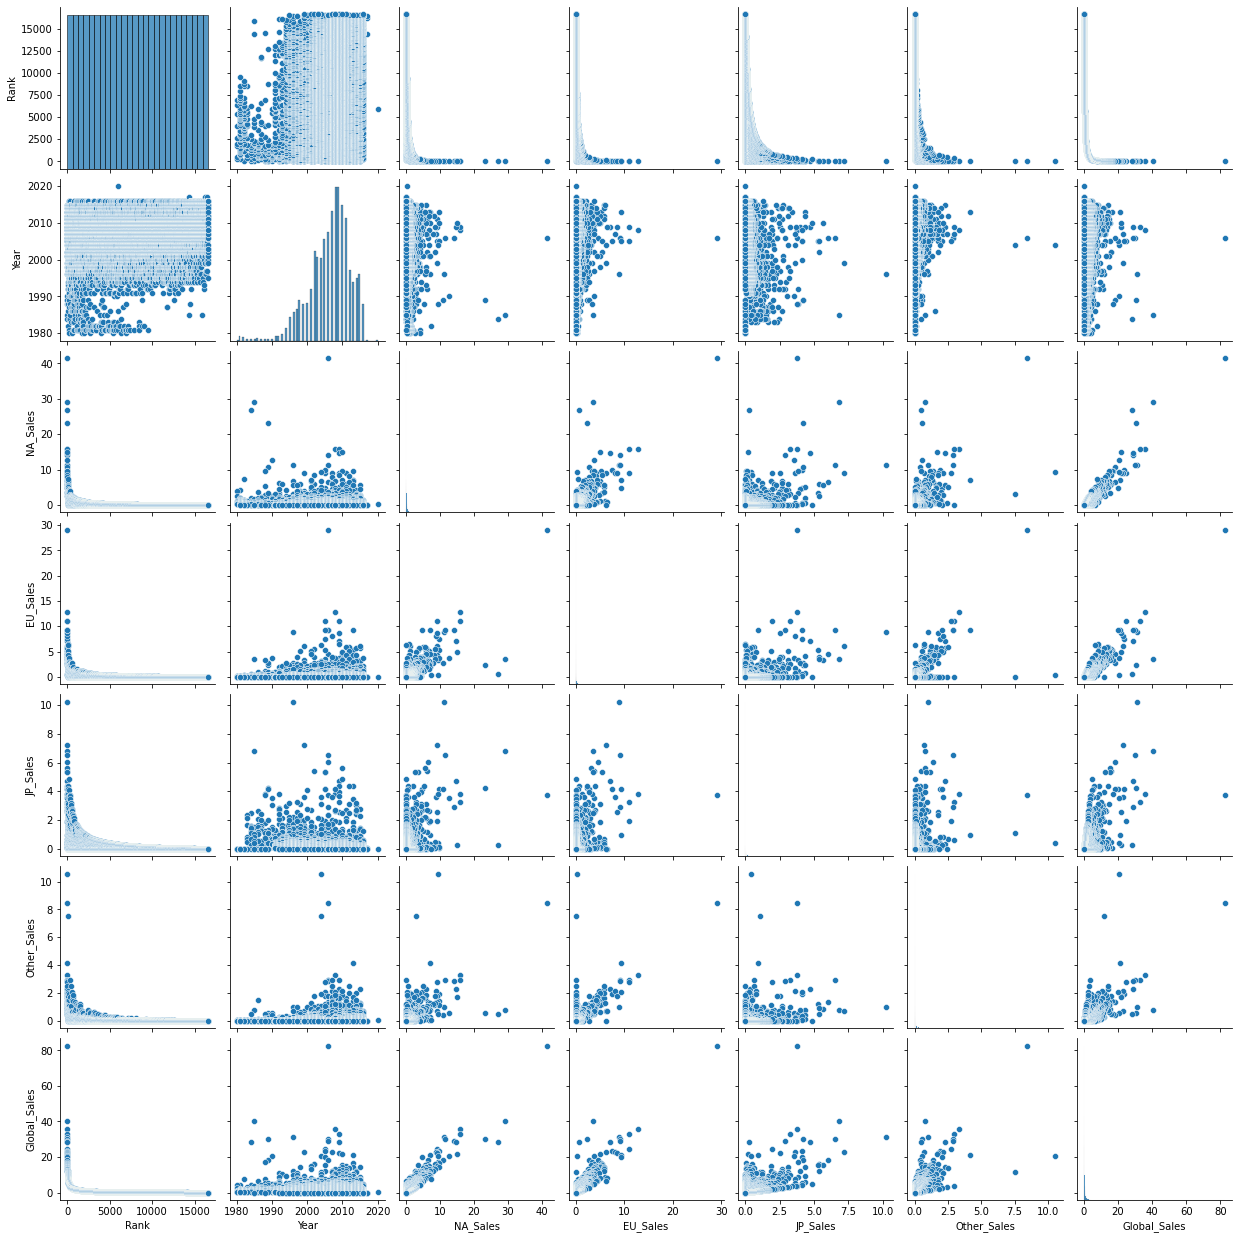

In [6]:
# カラム間の分布確認
sns.pairplot(df)

In [7]:
# 最もRankが低いデータ
df[df['Rank']==16599]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.0,0.01,0.0,0.0,0.01


In [8]:
# 最もGlobal_Salesが低いデータと高いデータ
df.sort_values('Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [9]:
# Publisher単位でGlobal_Salesの合計が高い順
df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50
Ubisoft,6964728,1843194.0,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...,...
Ongakukan,16425,2006.0,0.00,0.00,0.01,0.00,0.01
Commseed,16460,2008.0,0.00,0.00,0.01,0.00,0.01
Takuyo,16506,2011.0,0.00,0.00,0.01,0.00,0.01


<AxesSubplot:xlabel='Publisher'>

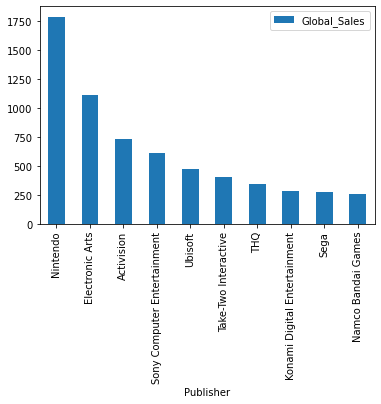

In [10]:
# 可視化
%matplotlib inline
df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)[:10].plot.bar(y='Global_Sales')

In [11]:
# Yearのユニークな値とそれぞれの値に対するレコード数
# Yearに変な値が入っていないか，またデータセットのYearの傾向を確認
df['Year'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [12]:
# 2017と2020のデータを確認
df.sort_values('Year', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
13647,13649,Hitman (2016),PS4,2016.0,Action,Square Enix,0.00,0.04,0.00,0.01,0.04
13596,13598,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
13602,13604,Refrain no Chika Meikyuu to Majo no Ryodan,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04
13614,13616,Utawarerumono: Futari no Hakuoro,PS4,2016.0,Misc,Aqua Plus,0.00,0.00,0.04,0.00,0.04
13620,13622,Kamen Rider: Battride War Genesis,PS3,2016.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04


In [13]:
# Genreのユニークな値一覧とそれぞれのGenreのレコード数確認
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [14]:
# Platformのユニークな値一覧とそれぞれのPlatformのレコード数確認
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<AxesSubplot:>

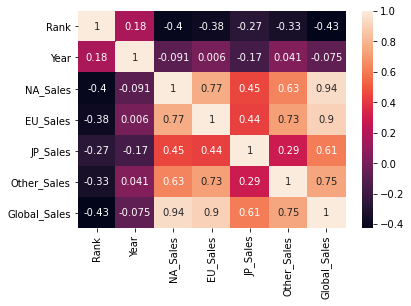

In [15]:
# カラム間の相関をヒートマップで確認
sns.heatmap(df.corr(), annot=True)

In [16]:
# Global_Salesは他のSales値の合計値なのか，別で取ってきた値なのか確認
df['NA_EU_JP_Other'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['|Global_Sales - NA_EU_JP_Other|'] = np.abs(df['Global_Sales'] - df['NA_EU_JP_Other'])
df.sort_values('|Global_Sales - NA_EU_JP_Other|', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP_Other,|Global_Sales - NA_EU_JP_Other|
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,7.18,0.02
1411,1413,Need for Speed: The Run,X360,2011.0,Action,Electronic Arts,0.63,0.58,0.00,0.15,1.38,1.36,0.02
1381,1383,Need For Speed: Undercover,PS2,2008.0,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40,1.42,0.02
1548,1550,Kid Icarus: Uprising,3DS,2012.0,Action,Nintendo,0.48,0.35,0.36,0.07,1.28,1.26,0.02
4591,4593,Yu-Gi-Oh! GX: Tag Force 2,PSP,2007.0,Strategy,Konami Digital Entertainment,0.03,0.20,0.10,0.11,0.42,0.44,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,7743,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14,0.05,0.00,0.00,0.19,0.19,0.00
7742,7744,The King of Fighters XI,PS2,2006.0,Fighting,Ignition Entertainment,0.07,0.06,0.04,0.02,0.19,0.19,0.00
7745,7747,Dragon Ball Z: Idainaru Dragon Ball Densetsu,PS,1996.0,Fighting,Namco Bandai Games,0.00,0.00,0.18,0.01,0.19,0.19,0.00
7750,7752,Ice Age: Dawn of the Dinosaurs,PS3,2009.0,Action,Activision,0.13,0.04,0.00,0.02,0.19,0.19,0.00
